In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Location Data

In [5]:
pwd

'/Users/andrewyaholkovsky/Documents/MSiAClasses/Spring2023/DeepLearning/Project'

In [6]:
ls

DLModelDeployment.drawio    MSiA432_gp5_project/
EDA Celeb Attributes.ipynb  archive(2)/


In [7]:
df_l = pd.read_csv("archive(2)/list_landmarks_align_celeba.csv")
df_l

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150
...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,69,111,108,111,89,140,73,151,104,153
202595,202596.jpg,67,112,110,112,85,141,66,150,110,150
202596,202597.jpg,69,111,107,111,92,137,68,151,109,153
202597,202598.jpg,69,111,108,111,90,137,71,153,106,151


## Partition

In [8]:
df_p = pd.read_csv("archive(2)/list_eval_partition.csv")
df_p

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


## Image

In [9]:
df_i = pd.read_csv("archive(2)/list_bbox_celeba.csv")
df_i

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166
...,...,...,...,...,...
202594,202595.jpg,1381,91,221,306
202595,202596.jpg,137,129,114,158
202596,202597.jpg,53,76,91,126
202597,202598.jpg,195,28,91,126


In [10]:
df_i.mean()

/var/folders/xg/8zx_jm0x3bddtdbddx13kckm0000gn/T/ipykernel_39292/3868774350.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_i.mean()


x_1       156.764564
y_1        84.335505
width     194.754061
height    268.922329
dtype: float64

<AxesSubplot:>

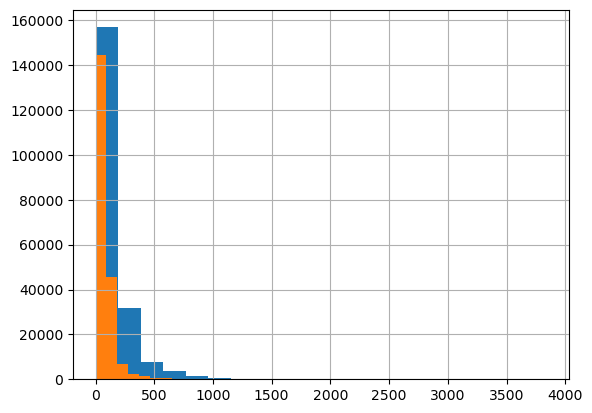

In [11]:
df_i['x_1'].hist(bins=20)
df_i['y_1'].hist(bins=20)

<AxesSubplot:>

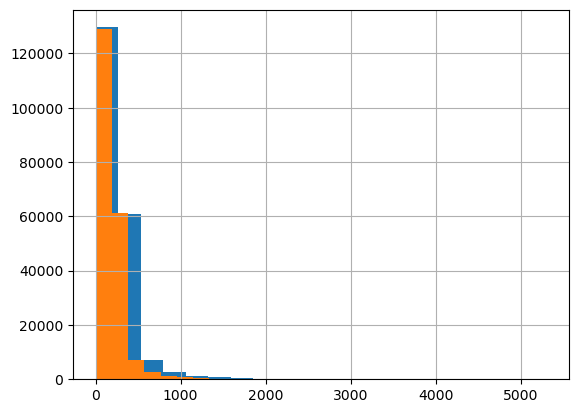

In [12]:
df_i['height'].hist(bins=20)
df_i['width'].hist(bins=20)

## Attributes

In [13]:
df_a = pd.read_csv("archive(2)/list_attr_celeba.csv")
df_a

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [14]:
df_a.shape

(202599, 41)

In [15]:
df_a.dtypes

image_id               object
5_o_Clock_Shadow        int64
Arched_Eyebrows         int64
Attractive              int64
Bags_Under_Eyes         int64
Bald                    int64
Bangs                   int64
Big_Lips                int64
Big_Nose                int64
Black_Hair              int64
Blond_Hair              int64
Blurry                  int64
Brown_Hair              int64
Bushy_Eyebrows          int64
Chubby                  int64
Double_Chin             int64
Eyeglasses              int64
Goatee                  int64
Gray_Hair               int64
Heavy_Makeup            int64
High_Cheekbones         int64
Male                    int64
Mouth_Slightly_Open     int64
Mustache                int64
Narrow_Eyes             int64
No_Beard                int64
Oval_Face               int64
Pale_Skin               int64
Pointy_Nose             int64
Receding_Hairline       int64
Rosy_Cheeks             int64
Sideburns               int64
Smiling                 int64
Straight_H

In [16]:
df_a.nunique()

image_id               202599
5_o_Clock_Shadow            2
Arched_Eyebrows             2
Attractive                  2
Bags_Under_Eyes             2
Bald                        2
Bangs                       2
Big_Lips                    2
Big_Nose                    2
Black_Hair                  2
Blond_Hair                  2
Blurry                      2
Brown_Hair                  2
Bushy_Eyebrows              2
Chubby                      2
Double_Chin                 2
Eyeglasses                  2
Goatee                      2
Gray_Hair                   2
Heavy_Makeup                2
High_Cheekbones             2
Male                        2
Mouth_Slightly_Open         2
Mustache                    2
Narrow_Eyes                 2
No_Beard                    2
Oval_Face                   2
Pale_Skin                   2
Pointy_Nose                 2
Receding_Hairline           2
Rosy_Cheeks                 2
Sideburns                   2
Smiling                     2
Straight_H

In [37]:
df_a

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


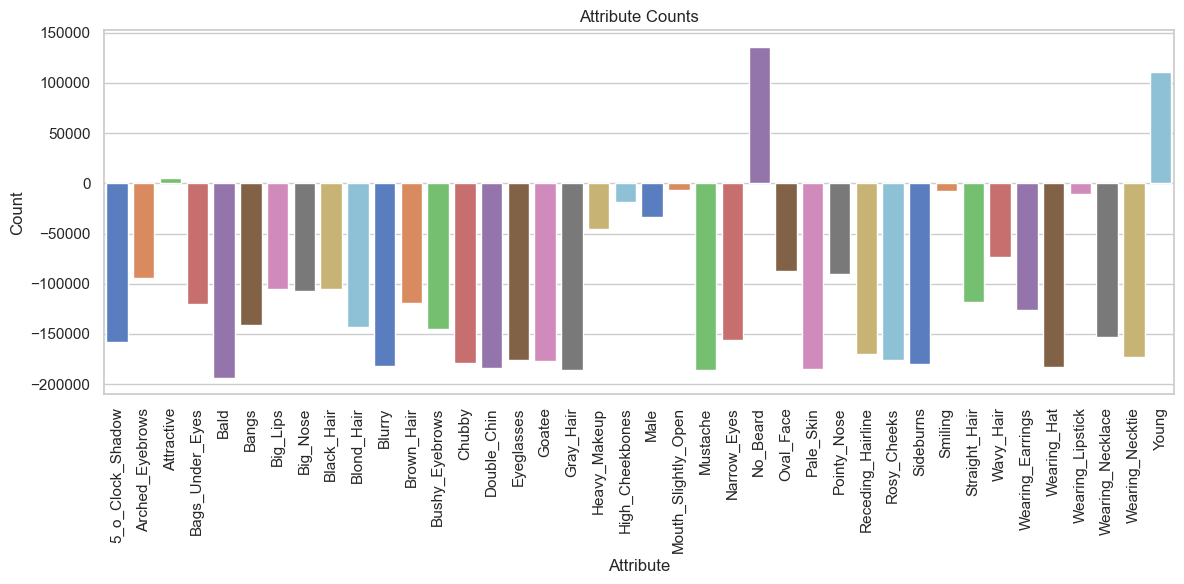

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bar Plot of Attribute Counts
attribute_counts = df_a.iloc[:, 1:].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=attribute_counts.index, y=attribute_counts.values, palette='muted')
plt.xlabel('Attribute')
plt.ylabel('Count')
plt.title('Attribute Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

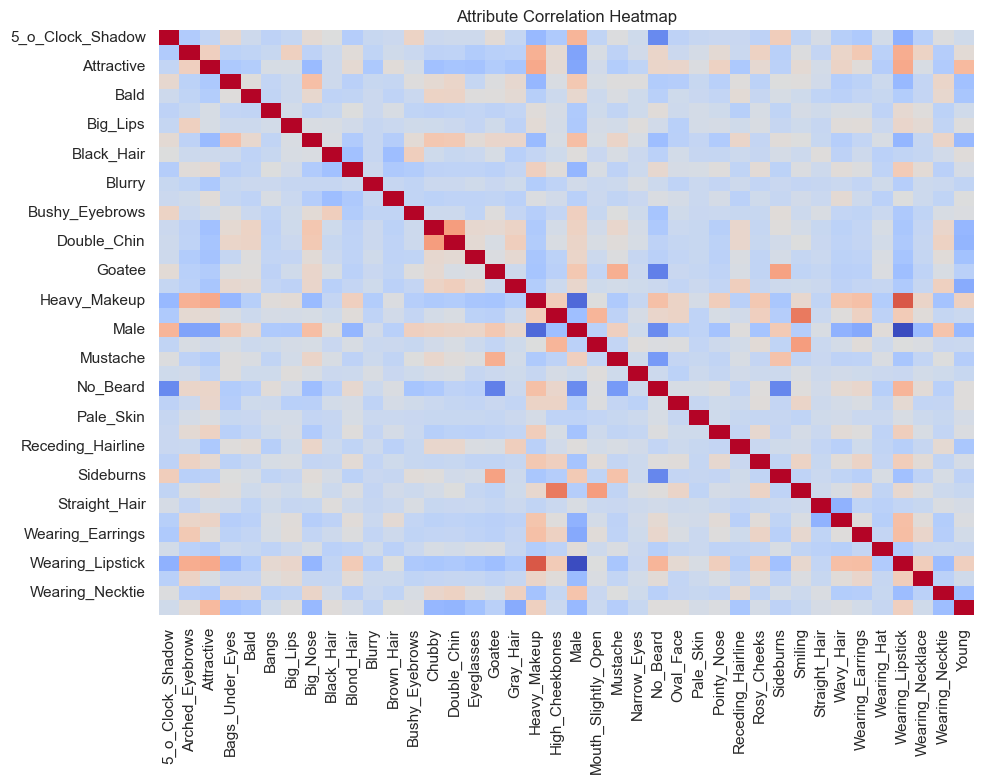

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_a.iloc[:, 1:].corr(), cmap='coolwarm', cbar=False)
plt.title('Attribute Correlation Heatmap')
plt.tight_layout()
plt.show()


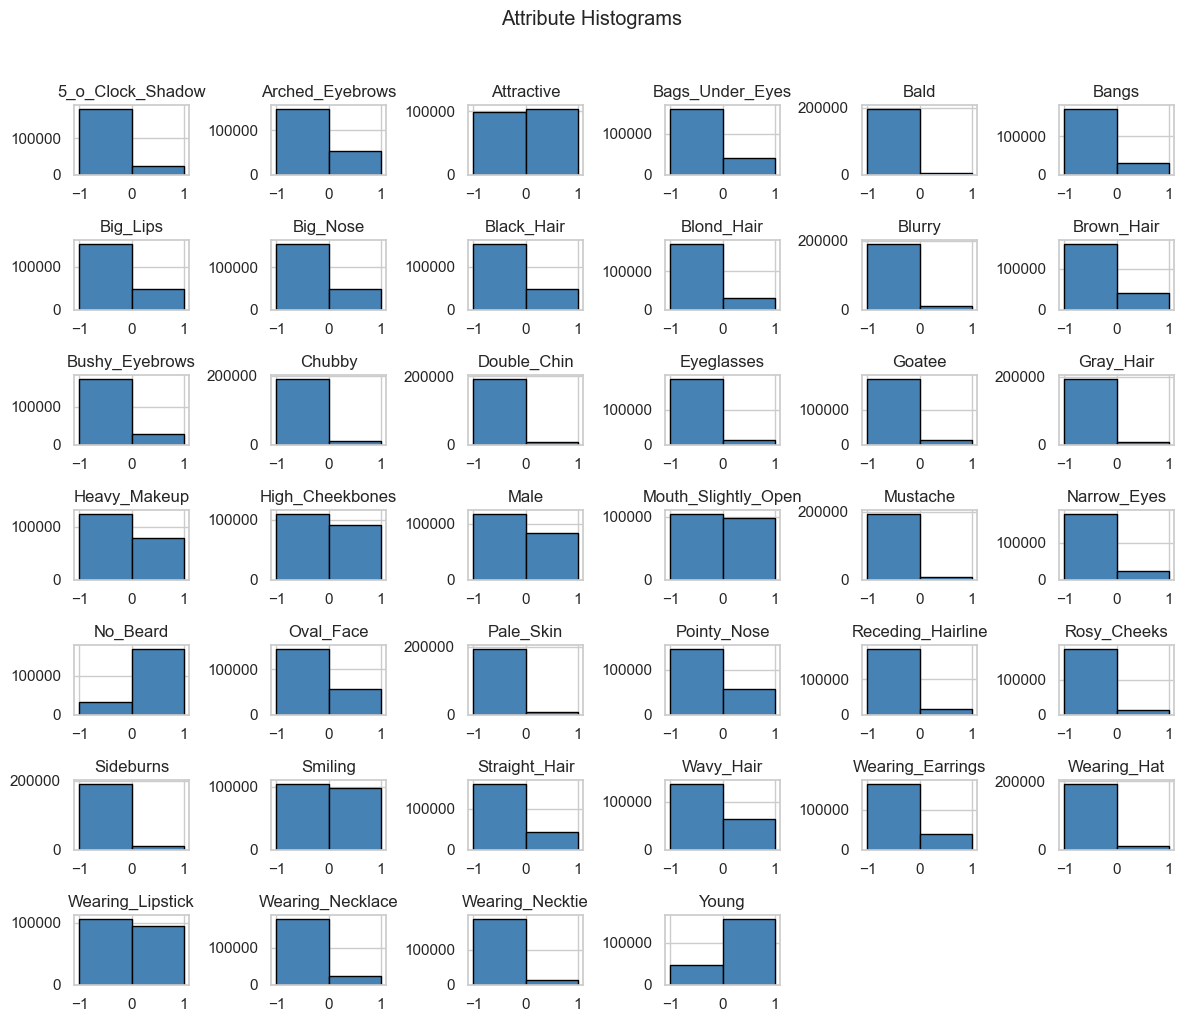

In [44]:
# Histograms
df_a.iloc[:, 1:].hist(figsize=(12, 10), bins=2, color='steelblue', edgecolor='black')
plt.suptitle('Attribute Histograms', y=1.02)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

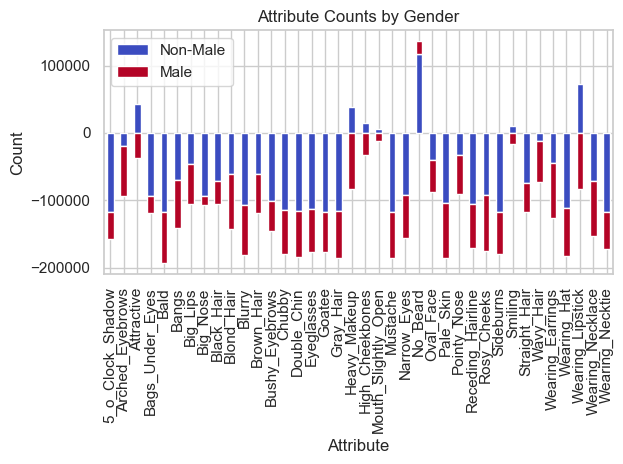

In [45]:
# Stacked Bar Plot by Gender
df_gender = df_a.groupby('Male').sum().drop('Young', axis=1)
df_gender = df_gender.transpose()
plt.figure(figsize=(12, 6))
df_gender.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('Attribute')
plt.ylabel('Count')
plt.title('Attribute Counts by Gender')
plt.xticks(rotation=90)
plt.legend(['Non-Male', 'Male'])
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bar Plot of Attribute Counts
attribute_counts = df_a.iloc[:, 1:].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=attribute_counts.index, y=attribute_counts.values, palette='muted')
plt.xlabel('Attribute')
plt.ylabel('Count')
plt.title('Attribute Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_a.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Attribute Correlation Heatmap')
plt.tight_layout()
plt.show()

# Pairwise Scatter Plot
sns.pairplot(df_a.iloc[:, 1:], diag_kind='hist')
plt.suptitle('Pairwise Scatter Plot', y=1.02)
plt.tight_layout()
plt.show()

# Histograms
df_a.iloc[:, 1:].hist(figsize=(12, 10), bins=2, color='steelblue', edgecolor='black')
plt.suptitle('Attribute Histograms', y=1.02)
plt.tight_layout()
plt.show()

# Stacked Bar Plot by Gender
df_gender = df_a.groupby('Male').sum().drop('Young', axis=1)
df_gender = df_gender.transpose()
plt.figure(figsize=(12, 6))
df_gender.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('Attribute')
plt.ylabel('Count')
plt.title('Attribute Counts by Gender')
plt.xticks(rotation=90)
plt.legend(['Non-Male', 'Male'])
plt.tight_layout()
plt.show()


In [17]:
result = df_a.groupby('Male')[['Attractive','Young','Smiling','Eyeglasses','Big_Nose']].agg(lambda x: x.eq(1).sum())

print(result)

      Attractive   Young  Smiling  Eyeglasses  Big_Nose
Male                                                   
-1         80254  103287    63871        2715     12085
 1         23579   53447    33798       10478     35431


In [35]:
result = df_a.groupby('Male')[['Attractive','Young','Smiling','Eyeglasses','Big_Nose']].agg(lambda x: x.eq(1).sum())

print(result)

      Attractive   Young  Smiling  Eyeglasses  Big_Nose
Male                                                   
-1         80254  103287    63871        2715     12085
 1         23579   53447    33798       10478     35431


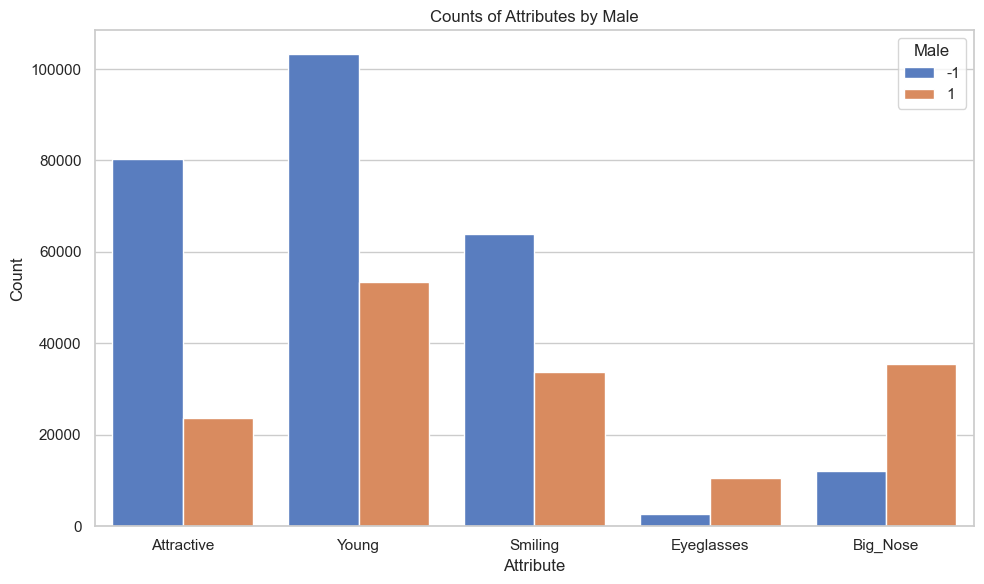

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the plot
result = df_a.groupby('Male')[['Attractive','Young','Smiling','Eyeglasses','Big_Nose']].agg(lambda x: x.eq(1).sum())

# Reset index to convert 'Male' column to a regular column
result = result.reset_index()

# Melt the dataframe for easier plotting
result_melted = result.melt(id_vars='Male', var_name='Attribute', value_name='Count')

# Set style
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=result_melted, x='Attribute', y='Count', hue='Male', palette='muted')

# Set labels and title
plt.xlabel('Attribute')
plt.ylabel('Count')
plt.title('Counts of Attributes by Male')

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
result = df_a.groupby('Attractive')[['Young','Smiling','Eyeglasses','Big_Nose']].agg(lambda x: x.eq(1).sum())

print(result)

            Young  Smiling  Eyeglasses  Big_Nose
Attractive                                      
-1          59975    40132       11996     35052
 1          96759    57537        1197     12464


In [20]:
result = df_a.groupby('Attractive')[['Young','Smiling','Eyeglasses','Big_Nose']].agg(lambda x: x.eq(-1).sum())

print(result)

            Young  Smiling  Eyeglasses  Big_Nose
Attractive                                      
-1          38791    58634       86770     63714
 1           7074    46296      102636     91369


In [21]:
result = df_a.groupby('Attractive')[['Black_Hair','Blond_Hair','Brown_Hair']].agg(lambda x: x.eq(1).sum())

print(result)

            Black_Hair  Blond_Hair  Brown_Hair
Attractive                                    
-1               23451        9051       14865
 1               25021       20932       26707


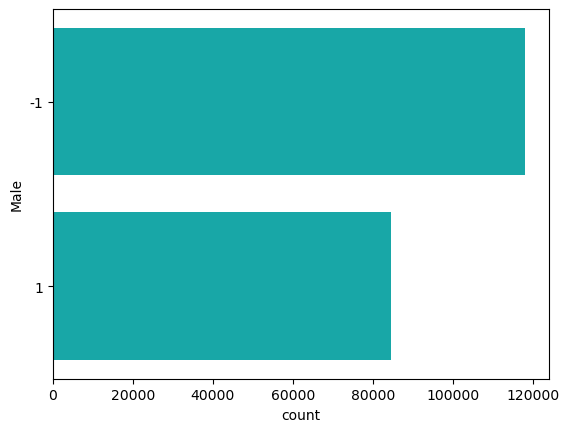

In [22]:
sns.countplot(y='Male', data=df_a, color="c")
plt.show()

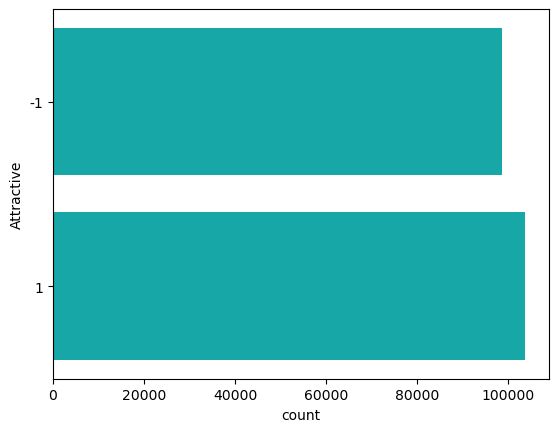

In [23]:
sns.countplot(y='Attractive', data=df_a, color="c")
plt.show()

In [24]:
df_a.groupby('Attractive').count()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
Attractive,,,,,,,,,,,,,,,,,,,,,
-1,98766,98766,98766,98766,98766,98766,98766,98766,98766,98766,...,98766,98766,98766,98766,98766,98766,98766,98766,98766,98766
1,103833,103833,103833,103833,103833,103833,103833,103833,103833,103833,...,103833,103833,103833,103833,103833,103833,103833,103833,103833,103833


In [25]:
column_names = df_a.columns.values.tolist()
column_names.remove('image_id')
#column_names

In [28]:
ratios = df_a[column_names].apply(lambda x: x.value_counts(normalize=True))

# Transpose the result to have a more readable output
ratios = ratios.transpose()

print(ratios)

                           -1         1
5_o_Clock_Shadow     0.888864  0.111136
Arched_Eyebrows      0.733019  0.266981
Attractive           0.487495  0.512505
Bags_Under_Eyes      0.795428  0.204572
Bald                 0.977557  0.022443
Bangs                0.848425  0.151575
Big_Lips             0.759204  0.240796
Big_Nose             0.765468  0.234532
Black_Hair           0.760749  0.239251
Blond_Hair           0.852008  0.147992
Blurry               0.949101  0.050899
Brown_Hair           0.794806  0.205194
Bushy_Eyebrows       0.857832  0.142168
Chubby               0.942433  0.057567
Double_Chin          0.953312  0.046688
Eyeglasses           0.934881  0.065119
Goatee               0.937236  0.062764
Gray_Hair            0.958050  0.041950
Heavy_Makeup         0.613078  0.386922
High_Cheekbones      0.544968  0.455032
Male                 0.583246  0.416754
Mouth_Slightly_Open  0.516572  0.483428
Mustache             0.958455  0.041545
Narrow_Eyes          0.884851  0.115149


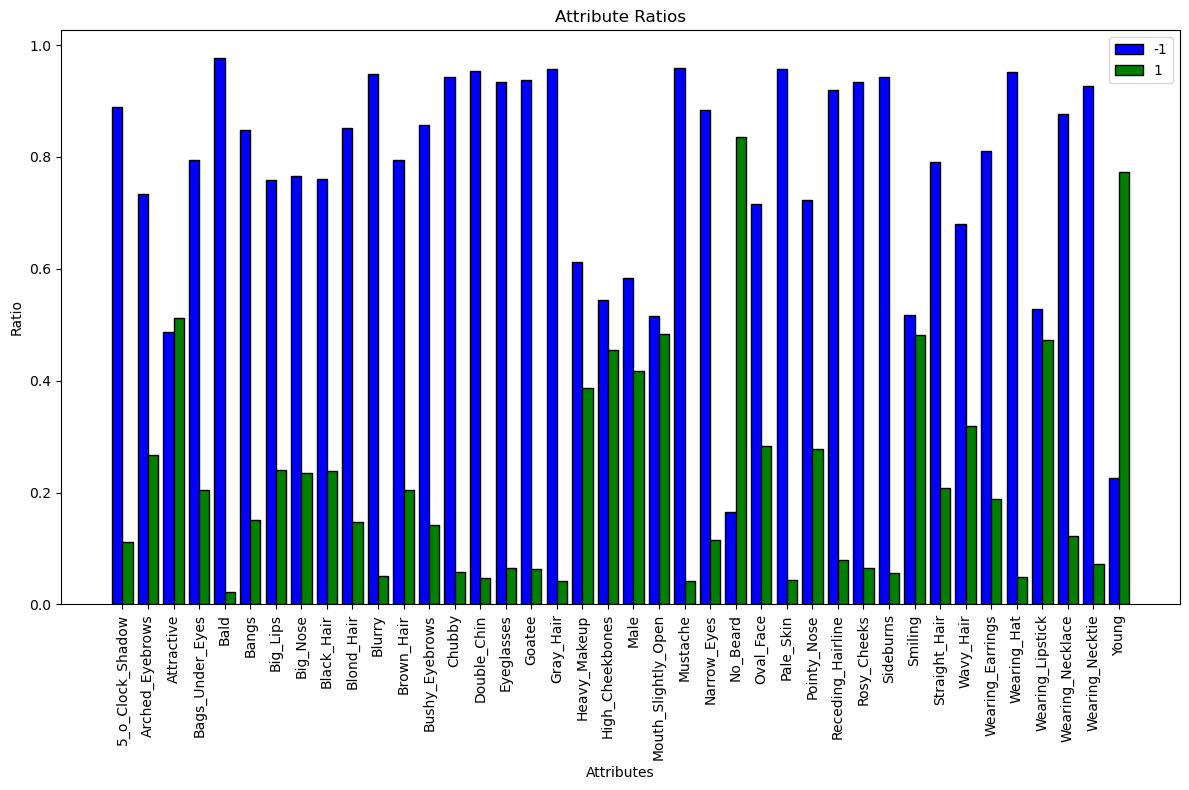

In [31]:
import matplotlib.pyplot as plt

# Data for the plot
categories = ratios.index
negative_ratios = ratios[-1].values  # Access column using integer
positive_ratios = ratios[1].values  # Access column using integer

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set the bar width
bar_width = 0.4

# Set the positions of the bars on the x-axis
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

# Plot the bars
ax.bar(r1, negative_ratios, color='b', width=bar_width, edgecolor='black', label='-1')
ax.bar(r2, positive_ratios, color='g', width=bar_width, edgecolor='black', label='1')

# Add labels and title
ax.set_xlabel('Attributes')
ax.set_ylabel('Ratio')
ax.set_title('Attribute Ratios')
ax.set_xticks([r + bar_width / 2 for r in range(len(categories))])
ax.set_xticklabels(categories, rotation=90)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
